# PAINTOR multi-ethnic fine-mapping

In [2]:
library(data.table)
library(dplyr)
library(ggplot2)

In [3]:
setwd("~/project-gandalm/isoform_twas/eqtl_new/")

In [4]:
eur <- fread("results/eur_perm_50HCP/all_assoc_perm_info.txt", data.table = F)
amr <- fread("results/amr_perm_15HCP/all_assoc_perm_info.txt", data.table = F)
afr <- fread("results/afr_perm_25HCP/all_assoc_perm_info.txt", data.table = F)

In [5]:
eur <- eur %>% filter(qval < .05)
amr <- amr %>% filter(qval < .05)
afr <- afr %>% filter(qval < .05)

In [6]:
dim(eur)
dim(amr)
dim(afr)

[1] 5296   15

[1] 3242   15

[1] 1876   15

In [7]:
shared <- eur %>% inner_join(amr, by = "pid") %>% inner_join(afr, by = "pid")
dim(shared)
head(shared)

[1] 986  43

,pid,nvar.x,shape1.x,shape2.x,dummy.x,sid.x,dist.x,npval.x,slope.x,ppval.x,...,sid,dist,npval,slope,ppval,bpval,qval,pval_nominal_threshold,gene_type,gene_name
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,...,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000001460,3692,1.05363,549.578,194.756,rs10489442,5655,5.76494e-25,-0.526664,9.999e-05,...,rs4592213,-1605,2.36174e-08,-1.062000,0.00019998,8.55103e-05,0.00192143,6.73094e-06,protein_coding,STPG1
2,ENSG00000002016,5008,1.04169,774.517,197.950,rs2887532,-47724,1.22335e-15,-0.466916,9.999e-05,...,rs3748523,-40481,8.68694e-07,-0.656173,0.00199980,2.72042e-03,0.03257760,4.62047e-06,protein_coding,RAD52
3,ENSG00000004534,2064,1.02671,132.097,191.012,rs6765484,63873,4.05994e-26,0.345270,9.999e-05,...,rs1357448049,55259,6.97000e-07,0.335468,0.00049995,6.37599e-04,0.01009900,4.36444e-05,protein_coding,RBM6
4,ENSG00000005801,4859,1.04382,761.473,194.033,rs112127733,5192,5.47218e-14,-0.316902,9.999e-05,...,chr11:3381737,2515,5.62582e-08,-0.399708,0.00009999,2.38548e-04,0.00447343,4.28499e-06,protein_coding,ZNF195
5,ENSG00000006007,4453,1.05372,545.913,192.512,rs11644848,35249,8.67388e-13,0.298892,9.999e-05,...,chr16:19499062,-23061,4.61409e-08,-0.317379,0.00029997,1.50476e-04,0.00306791,6.62136e-06,protein_coding,GDE1
6,ENSG00000008018,2578,1.05338,289.894,189.177,rs12527004,40474,5.32962e-26,-0.329155,9.999e-05,...,rs12717,-95,4.86128e-07,-0.244166,0.00129987,9.92135e-04,0.01449280,1.31916e-05,protein_coding,PSMB1


In [8]:
shared <- shared %>% select(pid)
write.table(shared, "paintor/eur_amr_afr_shared_egenes.txt", col.names = F, row.names = F, quote = F, sep = "\t")

### Select ENSG00000117899 (MESD) as an example to test run PAINTOR, ultimately should have 986 locus files (or 10094 ALL eGene)
- 3872 shared cis variants

In [3]:
eur_nominal <- fread("results/eur_nominal_50HCP/eur_ENSG00000117899.all_assoc.txt", header = F, data.table = F)
amr_nominal <- fread("results/amr_nominal_15HCP/amr_ENSG00000117899.all_assoc.txt", header = F, data.table = F)
afr_nominal <- fread("results/afr_nominal_25HCP/afr_ENSG00000117899.all_assoc.txt", header = F, data.table = F)

In [5]:
head(eur_nominal)
dim(eur_nominal)
dim(amr_nominal)
dim(afr_nominal)

,V1,V2,V3,V4,V5,V6
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000117899,rs72736580,-999112,0.671547,-0.0519136,0.9836779
2,ENSG00000117899,rs143184731,-998090,0.439940,0.1253850,0.9613369
3,ENSG00000117899,rs77161014,-996975,0.472903,0.1152430,0.9655408
4,ENSG00000117899,rs764585765,-995876,0.405902,0.0432230,0.9562402
5,ENSG00000117899,rs62025524,-994235,0.433346,0.0336609,0.9603563
6,ENSG00000117899,rs62025525,-994139,0.771454,0.0133245,0.9898541


[1] 4708    6

[1] 5648    6

[1] 6744    6

In [37]:
shared <- eur_nominal %>% inner_join(amr_nominal, by="V2") %>% inner_join(afr_nominal, by="V2")
dim(shared)

[1] 3872   16

### Input 1: Locus file. Calculate ZSCORE from pval

In [39]:
shared <- shared %>% mutate(z.x = sign(V5.x)*abs(qnorm(V4.x/2))) %>% 
                     mutate(z.y = sign(V5.y)*abs(qnorm(V4.y/2))) %>% 
                     mutate(z = sign(V5)*abs(qnorm(V4/2)))

In [46]:
# test other methods
shared <- shared %>% mutate(z.x1 = sign(V5.x)*sqrt(qchisq(V4.x,1,lower=FALSE))) %>% 
                     mutate(z.y1 = sign(V5.y)*sqrt(qchisq(V4.y,1,lower=FALSE))) %>% 
                     mutate(z1 = sign(V5)*sqrt(qchisq(V4,1,lower=FALSE)))
shared <- shared %>% mutate(z.x2 = ifelse(V5.x < 0, qnorm(V4.x/2), qnorm(1-V4.x/2))) %>% 
                     mutate(z.y2 = ifelse(V5.y < 0, qnorm(V4.y/2), qnorm(1-V4.y/2))) %>% 
                     mutate(z2 = ifelse(V5 < 0, qnorm(V4/2), qnorm(1-V4/2)))

In [48]:
cor(shared$z.x1,shared$z.x)
cor(shared$z.y1,shared$z.y)
cor(shared$z1,shared$z)

cor(shared$z.x2,shared$z.x)
cor(shared$z.y2,shared$z.y)
cor(shared$z2,shared$z)

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

[1] 1

In [55]:
sum(shared$z == shared$z1)

[1] 999

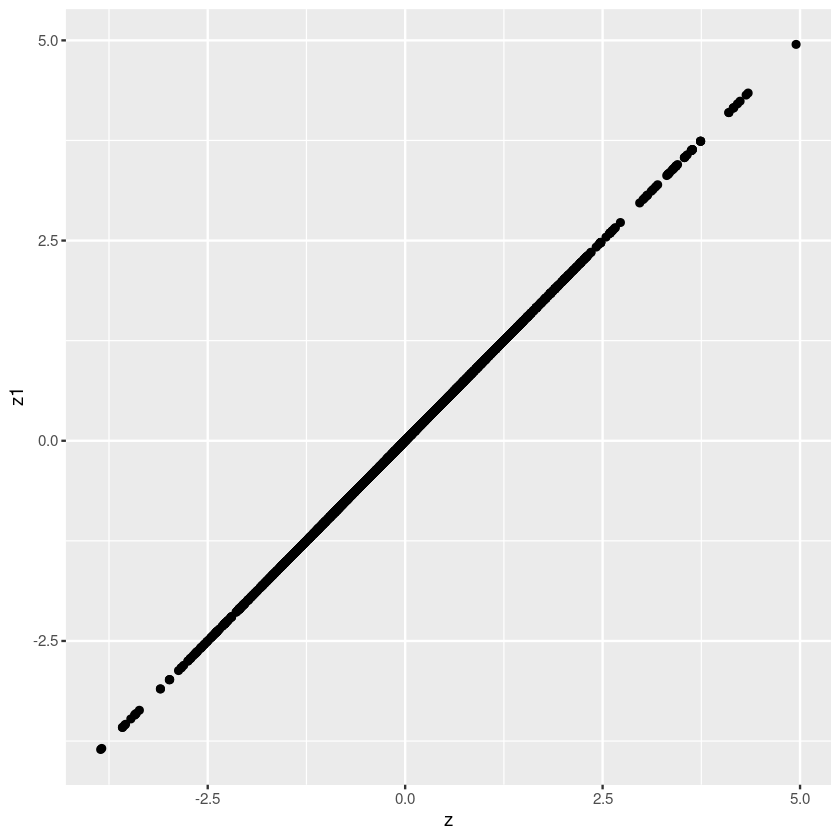

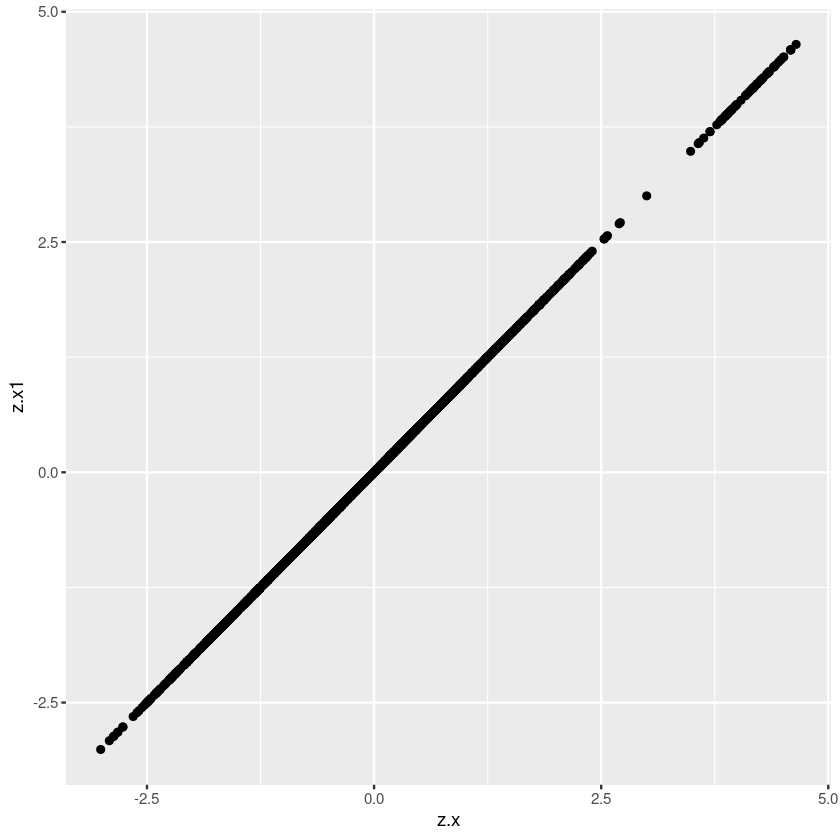

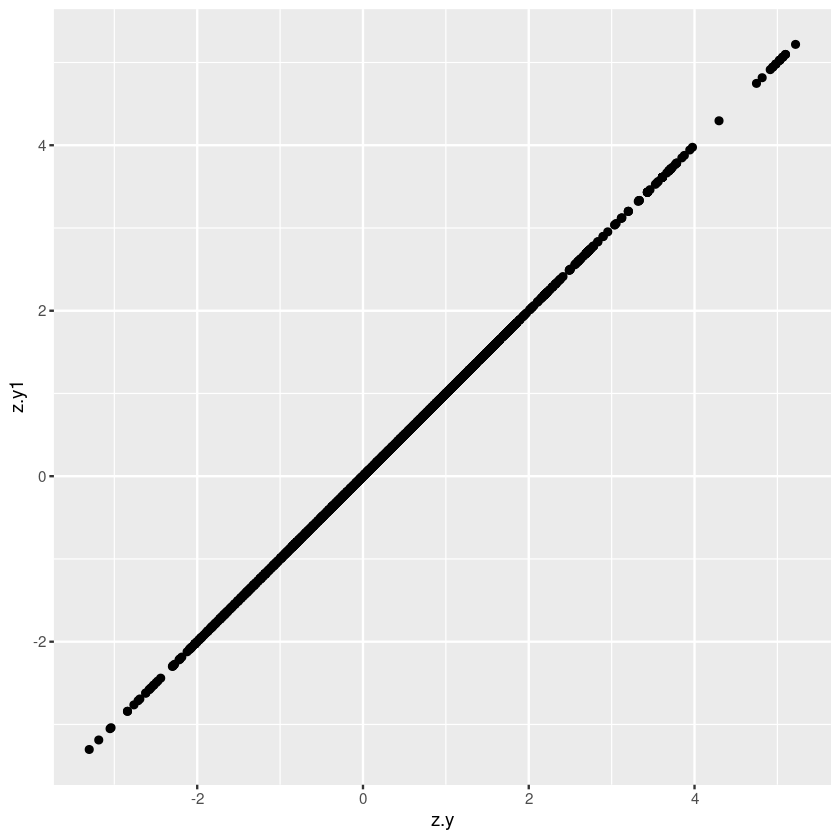

In [56]:
ggplot(shared, aes(x = z, y = z1)) +
    geom_point()
ggplot(shared, aes(x = z.x, y = z.x1)) +
    geom_point()
ggplot(shared, aes(x = z.y, y = z.y1)) +
    geom_point()

In [51]:
head(shared)

,V1.x,V2,V3.x,V4.x,V5.x,V6.x,V1.y,V3.y,V4.y,V5.y,...,V6,z,z.y,z.x,z.x1,z.y1,z1,z.x2,z.y2,z2
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000117899,rs72736580,-999112,0.671547,-0.0519136,0.9836779,ENSG00000117899,-999112,0.923601,0.0227704,...,0.9857481,-0.6854199,0.09589873,-0.4240258,-0.4240258,0.09589873,-0.6854199,-0.4240258,0.09589873,-0.6854199
2,ENSG00000117899,rs143184731,-998090,0.439940,0.1253850,0.9613369,ENSG00000117899,-998090,0.818756,0.0198716,...,0.9984839,0.1217576,0.22914528,0.7722945,0.7722945,0.22914528,0.1217576,0.7722945,0.22914528,0.1217576
3,ENSG00000117899,rs77161014,-996975,0.472903,0.1152430,0.9655408,ENSG00000117899,-996975,0.271806,0.3064540,...,0.9986094,0.1139985,1.09891304,0.7177637,0.7177637,1.09891304,0.1139985,0.7177637,1.09891304,0.1139985
4,ENSG00000117899,rs764585765,-995876,0.405902,0.0432230,0.9562402,ENSG00000117899,-995876,0.700033,0.0442587,...,0.9945278,0.3447398,0.38527592,0.8311268,0.8311268,0.38527592,0.3447398,0.8311268,0.38527592,0.3447398
5,ENSG00000117899,rs62025524,-994235,0.433346,0.0336609,0.9603563,ENSG00000117899,-994235,0.461211,0.0556486,...,0.9886096,-0.5924758,0.73685423,0.7834788,0.7834788,0.73685423,-0.5924758,0.7834788,0.73685423,-0.5924758
6,ENSG00000117899,rs62025525,-994139,0.771454,0.0133245,0.9898541,ENSG00000117899,-994139,0.156854,0.1325850,...,0.9968908,-0.2156341,1.41573195,0.2904735,0.2904735,1.41573195,-0.2156341,0.2904735,1.41573195,-0.2156341


In [9]:
# for(i in 1:nrow(shared)) {
#     if (shared[i,'V5.x'] < 0) {
#         shared[i,'z.x'] <- qnorm(shared[i,'V4.x']/2)
#     } else if (shared[i,'V5.x'] >= 0) {
#         shared[i,'z.x'] <- qnorm(1-shared[i,'V4.x']/2)
#     }
#     if (shared[i,'V5.y'] < 0) {
#         shared[i,'z.y'] <- qnorm(shared[i,'V4.y']/2)
#     } else if (shared[i,'V5.y'] >= 0) {
#         shared[i,'z.y'] <- qnorm(1-shared[i,'V4.y']/2)
#     }
#     if (shared[i,'V5'] < 0) {
#         shared[i,'z'] <- qnorm(shared[i,'V4']/2)
#     } else if (shared[i,'V5'] >= 0) {
#         shared[i,'z'] <- qnorm(1-shared[i,'V4']/2)
#     }
# }

In [10]:
shared <- shared %>% select(V2, z.x, z.y, z)
head(shared)

,V2,z.x,z.y,z
,<chr>,<dbl>,<dbl>,<dbl>
1,rs72736580,-0.4240258,0.09589873,-0.6854199
2,rs143184731,0.7722945,0.22914528,0.1217576
3,rs77161014,0.7177637,1.09891304,0.1139985
4,rs764585765,0.8311268,0.38527592,0.3447398
5,rs62025524,0.7834788,0.73685423,-0.5924758
6,rs62025525,0.2904735,1.41573195,-0.2156341


In [11]:
colnames(shared) <- c("RSID", "ZSCORE.P1", "ZSCORE.P2", "ZSCORE.P3")
write.table(shared, "paintor/MESDC2/Locus1", col.names = T, row.names = F, sep = " ", quote = F)

In [12]:
id <- shared %>% select(RSID)
write.table(id, "paintor/MESDC2/shared_variants.txt", col.names = F, row.names = F, quote = F, sep = "\t")

### Input 2: LD. Use plink to estimate LD of the shared variants in all 3 populations

`plink --r2 bin \
--vcf ${file} \
--extract shared_variants.txt \
--out eur`

In [16]:
# ?readBin

In [26]:
num_var=3872

In [17]:
myFile <- file('paintor/MESDC2/eur.ld.bin', 'rb')
eur_ld <- readBin(myFile, what="numeric", n=num_var*num_var, size=8)
close(myFile)

In [18]:
dim(eur_ld)

NULL

In [19]:
length(eur_ld)

[1] 14992384

In [27]:
num_var^2

[1] 14992384

In [21]:
head(eur_ld)

[1] 1.0000000000 0.0020964361 0.0018798301 0.0004047794 0.0364906086
[6] 0.0561912489

In [22]:
head(which(eur_ld == 1))

[1]     1  3874  7747 11620 11630 11631

**Don't know the order, if it's row1, row2, ... or col1, col2, ... But doesn't matter! It's the same.**

In [23]:
eur_matrix <- matrix(eur_ld, nrow = num_var)

In [24]:
dim(eur_matrix)

[1] 3872 3872

In [25]:
write.table(eur_matrix, "paintor/MESDC2/Locus1.LD1", col.names = F, row.names = F, quote = F, sep = " ")

In [28]:
myFile <- file('paintor/MESDC2/amr.ld.bin', 'rb')
amr_ld <- readBin(myFile, what="numeric", n=num_var*num_var, size=8)
close(myFile)
length(amr_ld)
amr_matrix <- matrix(amr_ld, nrow = num_var)
write.table(amr_matrix, "paintor/MESDC2/Locus1.LD2", col.names = F, row.names = F, quote = F, sep = " ")

[1] 14992384

In [29]:
myFile <- file('paintor/MESDC2/afr.ld.bin', 'rb')
afr_ld <- readBin(myFile, what="numeric", n=num_var*num_var, size=8)
close(myFile)
length(afr_ld)
afr_matrix <- matrix(afr_ld, nrow = num_var)
write.table(afr_matrix, "paintor/MESDC2/Locus1.LD3", col.names = F, row.names = F, quote = F, sep = " ")

[1] 14992384

### Input 3: annotation. Generate annotation file for the shared cis-variants
- Cannot use annotation file generated for torus, which is for the variants in ALL geontype. Does not cover all shared variants between EUR, AMR, AFR
- Generate annot from ENCODE Regulatory Build 
- Not including VEP annotations, haven't run VEP on EUR VCF
- test running with `promoter_d` only

In [30]:
head(id)

,RSID
,<chr>
1,rs72736580
2,rs143184731
3,rs77161014
4,rs764585765
5,rs62025524
6,rs62025525


In [33]:
annot <- fread("../genotype/all_data/isec_R2_greater_than_3/ancestry/annot/eur_variant_annot.txt.gz", data.table = F)
head(annot)

,SNP,TF_binding_site_d,promoter_flanking_region_d,promoter_d,open_chromatin_region_d,enhancer_d,CTCF_binding_site_d
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,rs61769339,0,1,0,0,0,0
2,rs12238997,0,0,0,0,0,0
3,rs61769351,0,0,0,0,0,0
4,rs142559957,0,0,0,0,0,0
5,rs58276399,0,0,0,0,0,0
6,rs61770163,0,0,0,0,0,0


In [34]:
id <- id %>% left_join(annot, by=c("RSID"="SNP"))
dim(id)

[1] 3872    7

In [35]:
locus.id <- id %>% select(-1)

In [36]:
write.table(locus.id, "paintor/MESDC2/Locus1.annotations", col.names = T, row.names = F, quote = F, sep = " ")

In [41]:
colnames(locus.id)

[1] "TF_binding_site_d"          "promoter_flanking_region_d"
[3] "promoter_d"                 "open_chromatin_region_d"   
[5] "enhancer_d"                 "CTCF_binding_site_d"

### PAINTOR results
- `--enumerate 2` maximum number of causal is 2
- rs9806417/chr15_81279136_G_A is the target SNP in locuszoom plot. Lead eQTL and fine-mapped eQTL in AFR, in CS of AMR and EUR
- PAINTOR result has prioritized this SNP
- ALL susie result did not!

In [3]:
res <- fread("paintor/MESDC2/Locus1.results", data.table = F)

In [4]:
head(res)

,RSID,ZSCORE.P1,ZSCORE.P2,ZSCORE.P3,Posterior_Prob
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,rs72736580,-0.4240258,0.09589873,-0.6854199,2.97448e-12
2,rs143184731,0.7722945,0.22914528,0.1217576,2.70088e-12
3,rs77161014,0.7177637,1.09891304,0.1139985,4.25359e-12
4,rs764585765,0.8311268,0.38527592,0.3447398,2.16276e-20
5,rs62025524,0.7834788,0.73685423,-0.5924758,4.24950e-12
6,rs62025525,0.2904735,1.41573195,-0.2156341,5.81782e-12


In [6]:
res %>% filter(RSID == "rs9806417")

RSID,ZSCORE.P1,ZSCORE.P2,ZSCORE.P3,Posterior_Prob
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
rs9806417,4.420496,5.026723,4.949997,0.996548


In [10]:
head(res[order(res$Posterior_Prob, decreasing = TRUE),])

,RSID,ZSCORE.P1,ZSCORE.P2,ZSCORE.P3,Posterior_Prob
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2118,rs11419364,4.038905,4.815978,-3.552792,9.98489e-01
2106,rs9806417,4.420496,5.026723,4.949997,9.96548e-01
2072,chr15:80976374,4.261307,5.026723,4.317299,1.91323e-03
2070,rs8036618,4.088164,5.026723,4.342572,1.52684e-03
2171,rs34354527,3.580757,4.747460,-3.855291,1.50885e-03
2143,rs56246246,4.478802,5.063729,4.154549,9.50162e-06


### SuSiE results: ALL, and ancestry-specific

In [11]:
susie <- fread("results/susie_finemap/mixed_ciseqtl_90hcp_perm_purity_filtered.txt.gz", data.table = F)

In [13]:
susie %>% filter(phenotype_id == "ENSG00000117899")

phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ENSG00000117899,chr15_81261949_G_A,15,81261949,G,A,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.06744927,9.912912,0.8026966,0.8949532,9,0.020356832,0.07676665,17.66454
ENSG00000117899,chr15_81263140_T_C,15,81263140,T,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.07462896,9.924487,0.8026966,0.8949532,9,0.022499592,0.08028691,17.66454
ENSG00000117899,chr15_81263436_G_C,15,81263436,G,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.25929360,10.070300,0.8026966,0.8949532,9,0.080041867,0.13649396,17.66454
ENSG00000117899,chr15_81263637_C_T,15,81263637,C,T,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.23455270,10.059047,0.8026966,0.8949532,9,0.072571800,0.13227880,17.66454
ENSG00000117899,chr15_81285875_C_T,15,81285875,C,T,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.03840343,9.842851,0.8026966,0.8949532,9,0.011112344,0.05679582,17.66454
ENSG00000117899,chr15_81286252_T_G,15,81286252,T,G,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.03473821,9.830070,0.8026966,0.8949532,9,0.009999753,0.05393040,17.66454
ENSG00000117899,chr15_81289272_T_C,15,81289272,T,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.08442346,9.936038,0.8026966,0.8949532,9,0.024643090,0.08218883,17.66454
ENSG00000117899,chr15_81290783_T_C,15,81290783,T,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.09486683,9.946820,0.8026966,0.8949532,9,0.028144996,0.08798305,17.66454
ENSG00000117899,chr15_81292762_G_A,15,81292762,G,A,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.08319193,9.931144,0.8026966,0.8949532,9,0.024529469,0.08247539,17.66454


In [18]:
susie_eur <- fread("results/susie_finemap/eur_ciseqtl_50hcp_perm_purity_filtered.txt.gz", data.table = F)
susie_eur %>% filter(phenotype_id == "ENSG00000117899")

phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ENSG00000117899,chr15_81249076_T_C,15,81249076,T,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.050869025,5.346830,0.275255,0.7043137,51,0.0114411905,0.05127328,2.839339
ENSG00000117899,chr15_81261949_G_A,15,81261949,G,A,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.034938967,5.274990,0.275255,0.7043137,51,0.0071587132,0.03930282,2.839339
ENSG00000117899,chr15_81263140_T_C,15,81263140,T,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.034938967,5.274990,0.275255,0.7043137,51,0.0071587132,0.03930282,2.839339
ENSG00000117899,chr15_81263436_G_C,15,81263436,G,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.034938967,5.274990,0.275255,0.7043137,51,0.0071587132,0.03930282,2.839339
ENSG00000117899,chr15_81263637_C_T,15,81263637,C,T,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.034938967,5.274990,0.275255,0.7043137,51,0.0071587132,0.03930282,2.839339
ENSG00000117899,chr15_81265953_A_G,15,81265953,A,G,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.011913150,4.973080,0.275255,0.7043137,51,0.0021035565,0.02102206,2.839339
ENSG00000117899,chr15_81266406_C_T,15,81266406,C,T,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.015099518,5.048408,0.275255,0.7043137,51,0.0028278975,0.02465933,2.839339
ENSG00000117899,chr15_81268715_A_G,15,81268715,A,G,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.008195924,4.884943,0.275255,0.7043137,51,0.0013511259,0.01690219,2.839339
ENSG00000117899,chr15_81271406_C_A,15,81271406,C,A,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.006925754,4.797996,0.275255,0.7043137,51,0.0011871025,0.01662322,2.839339


In [16]:
susie_amr <- fread("results/susie_finemap/amr_ciseqtl_15hcp_perm_purity_filtered.txt.gz", data.table = F)
susie_amr %>% filter(phenotype_id == "ENSG00000117899")

phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ENSG00000117899,chr15_81254628_A_C,15,81254628,A,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.05248535,5.920117,0.7037162,0.8725997,32,0.020810976,0.08974491,4.441719
ENSG00000117899,chr15_81259226_C_A,15,81259226,C,A,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.02440329,5.615501,0.7037162,0.8725997,32,0.009238586,0.05930767,4.441719
ENSG00000117899,chr15_81259833_C_T,15,81259833,C,T,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.03789349,5.636346,0.7037162,0.8725997,32,0.014434229,0.07382445,4.441719
ENSG00000117899,chr15_81261949_G_A,15,81261949,G,A,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.01290777,5.579435,0.7037162,0.8725997,32,0.004871316,0.04327842,4.441719
ENSG00000117899,chr15_81262001_C_G,15,81262001,C,G,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.01454658,5.626851,0.7037162,0.8725997,32,0.005555817,0.04645162,4.441719
ENSG00000117899,chr15_81263140_T_C,15,81263140,T,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.01290777,5.579435,0.7037162,0.8725997,32,0.004871316,0.04327842,4.441719
ENSG00000117899,chr15_81263436_G_C,15,81263436,G,C,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.01473357,5.624492,0.7037162,0.8725997,32,0.005562945,0.04620951,4.441719
ENSG00000117899,chr15_81263637_C_T,15,81263637,C,T,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.01473357,5.624492,0.7037162,0.8725997,32,0.005562945,0.04620951,4.441719
ENSG00000117899,chr15_81265953_A_G,15,81265953,A,G,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.09374941,5.845858,0.7037162,0.8725997,32,0.037406695,0.11805282,4.441719


In [17]:
susie_afr <- fread("results/susie_finemap/afr_ciseqtl_25hcp_perm_purity_filtered.txt.gz", data.table = F)
susie_afr %>% filter(phenotype_id == "ENSG00000117899")

phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ENSG00000117899,chr15_81267430_A_T,15,81267430,A,T,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.02359203,5.239136,0.8643717,0.9395844,3,0.008675238,0.05773493,4.066283
ENSG00000117899,chr15_81268715_A_G,15,81268715,A,G,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.02099450,5.205726,0.8643717,0.9395844,3,0.007645267,0.05413656,4.066283
ENSG00000117899,chr15_81279136_G_A,15,81279136,G,A,ENSG00000117899_L1,L1,chr15:80282168-82282168,0.91972435,6.059382,0.8643717,0.9395844,3,0.378817519,0.12826046,4.066283


**Cannot plot locuszoom for the second paintor causal, not in locuszoom reference. Used plink to calculate LD for the 2 variants in each population. They are in high LD!**

In [5]:
num_var=2
myFile <- file("paintor/MESDC2/eur_variants_ld.ld.bin", "rb")
eur_ld <- readBin(myFile, what = "numeric", n = num_var*num_var, size = 8)

In [6]:
eur_ld

[1] 1.0000000 0.9060027 0.9060027 1.0000000

In [7]:
myFile <- file("paintor/MESDC2/amr_variants_ld.ld.bin", "rb")
amr_ld <- readBin(myFile, what = "numeric", n = num_var*num_var, size = 8)
amr_ld

[1] 1.0000000 0.7963919 0.7963919 1.0000000

In [8]:
myFile <- file("paintor/MESDC2/afr_variants_ld.ld.bin", "rb")
afr_ld <- readBin(myFile, what = "numeric", n = num_var*num_var, size = 8)
afr_ld

[1] 1.0000000 0.4611216 0.4611216 1.0000000